In [ ]:
import pandas as pd

,step,num_vehicles,avg_intervehicular_distance,northbound_flow,southbound_flow,northbound_speed,southbound_speed,average_speed
0,1,1,0.0,1,0,22.351000,0,22.352000
1,2,1,0.0,1,0,22.081392,0,21.812784
2,3,1,0.0,1,0,22.283030,0,22.216061
3,4,1,0.0,1,0,22.344817,0,22.339635
4,5,1,0.0,1,0,22.302199,0,22.254397


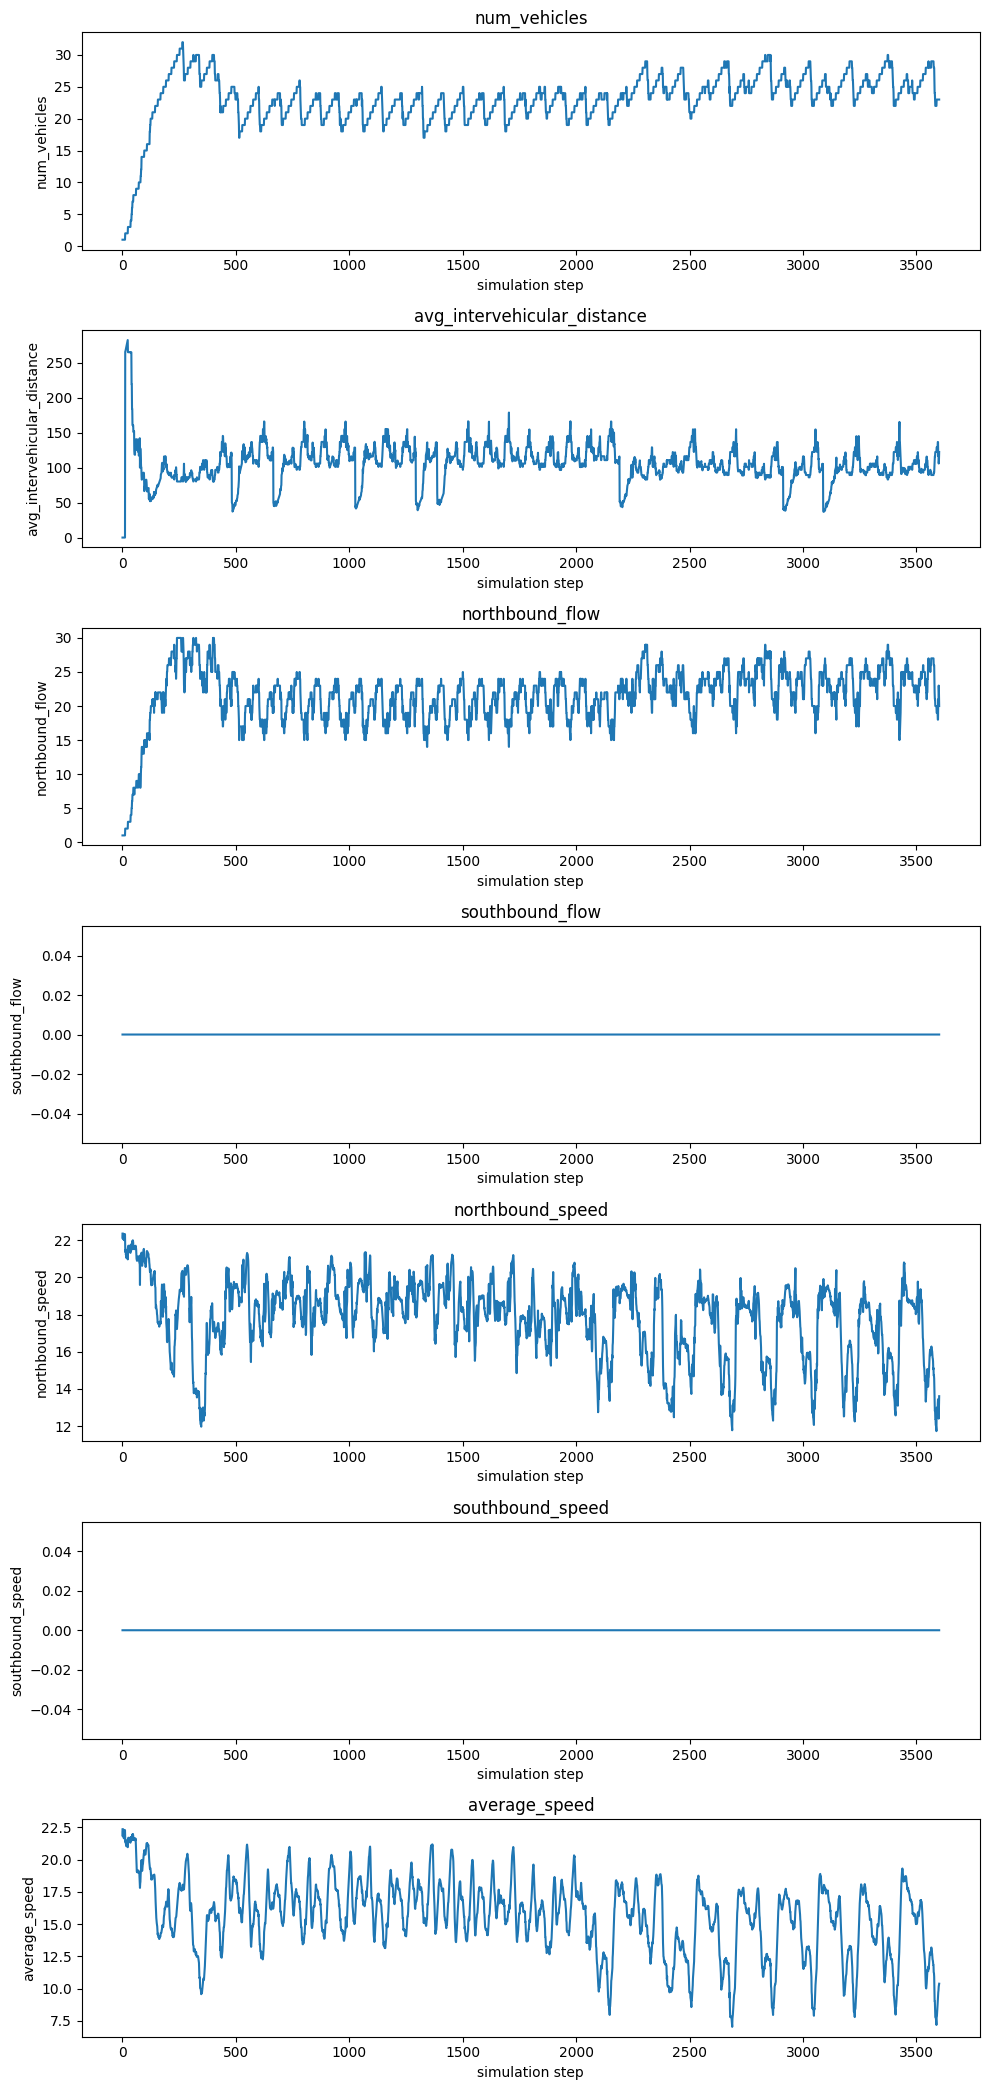

Averages over entire run:


,mean
num_vehicles,23.133056
avg_intervehicular_distance,105.889497
northbound_flow,21.611944
southbound_flow,0.000000
northbound_speed,17.813169
southbound_speed,0.000000
average_speed,15.618443


In [2]:
# Jupyter Notebook cell  – analyze simulation_metrics/test.csv
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("test.csv")

# quick look
display(df.head())

# line‑plots for each numeric column except the step index
metrics = [c for c in df.columns if c != "step"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

for ax, col in zip(axes, metrics):
    ax.plot(df["step"], df[col])
    ax.set_title(col)
    ax.set_xlabel("simulation step")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# print simple averages
print("Averages over entire run:")
display(df[metrics].mean().to_frame("mean"))


,step,num_vehicles,avg_intervehicular_distance,northbound_flow,southbound_flow,northbound_speed,southbound_speed,average_speed
0,5,1,0.000000,1,0,22.302199,0.0,22.254397
1,10,1,0.000000,1,0,22.192454,0.0,22.034908
2,15,2,268.200829,2,0,21.488576,0.0,21.488576
3,20,2,276.178737,2,0,21.471380,0.0,21.471380
4,25,3,265.055914,3,0,21.605488,0.0,21.605488


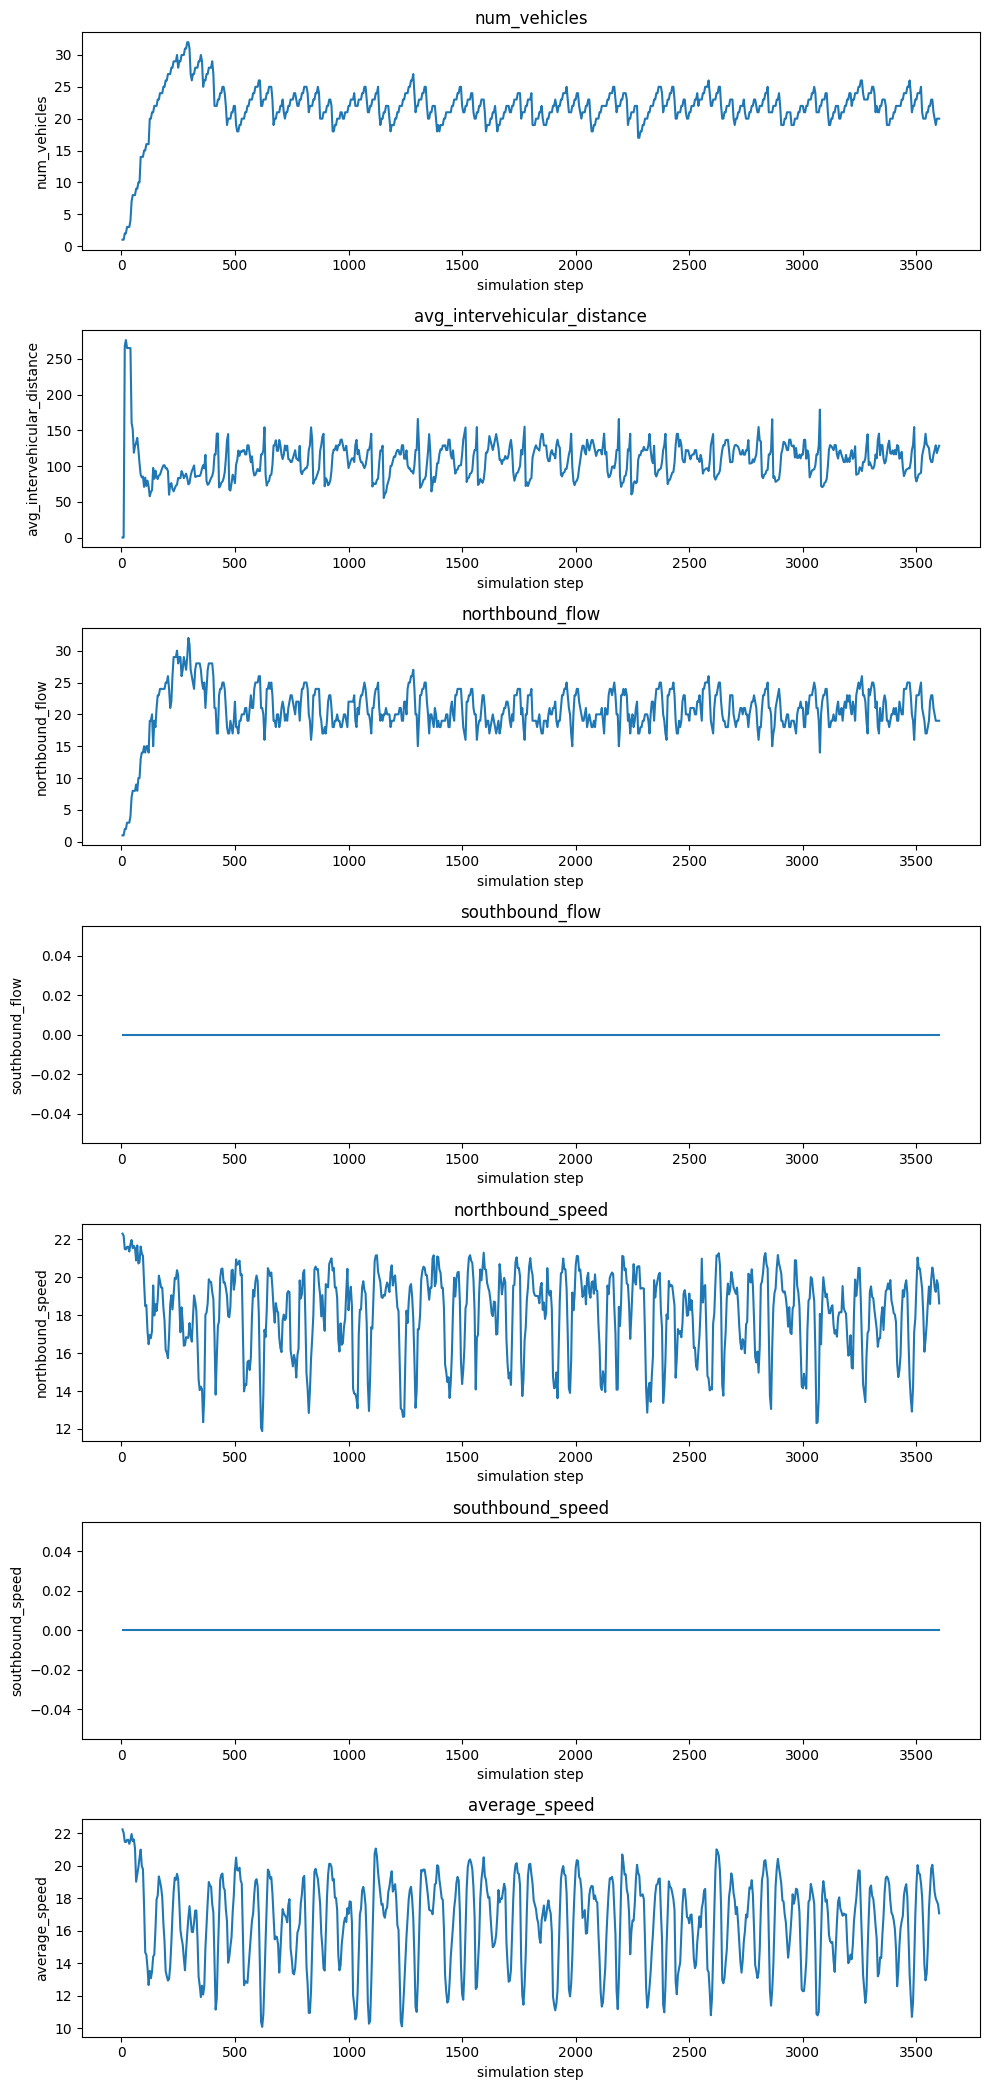

Averages over entire run:


,mean
num_vehicles,21.893056
avg_intervehicular_distance,108.792298
northbound_flow,20.727778
southbound_flow,0.000000
northbound_speed,18.154788
southbound_speed,0.000000
average_speed,16.562066


In [3]:
# test_simulation_metrics_no_signal_coordination.csv
# Jupyter Notebook cell  – analyze simulation_metrics/test.csv
import pandas as pd
import matplotlib.pyplot as plt

# read data
df = pd.read_csv("test_simulation_metrics_no_signal_coordination.csv")

# quick look
display(df.head())

# line‑plots for each numeric column except the step index
metrics = [c for c in df.columns if c != "step"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 3 * len(metrics)))

for ax, col in zip(axes, metrics):
    ax.plot(df["step"], df[col])
    ax.set_title(col)
    ax.set_xlabel("simulation step")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# print simple averages
print("Averages over entire run:")
display(df[metrics].mean().to_frame("mean"))


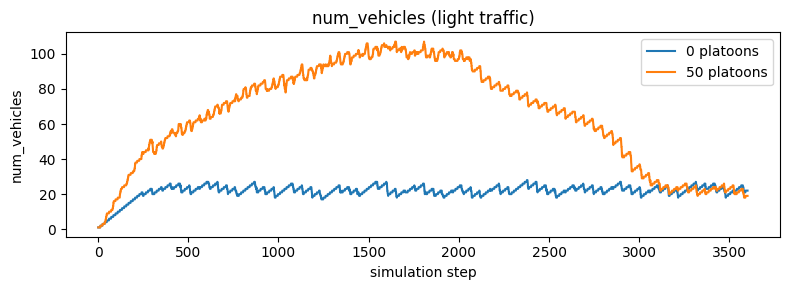

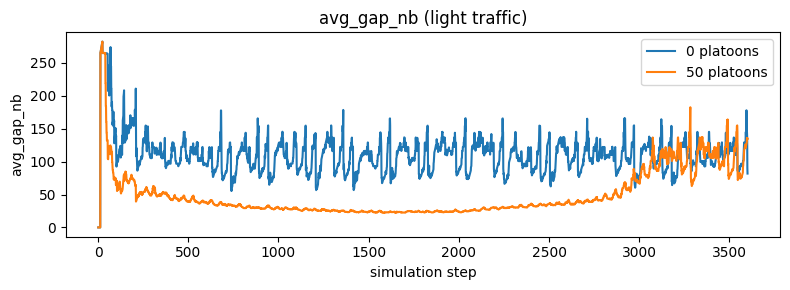

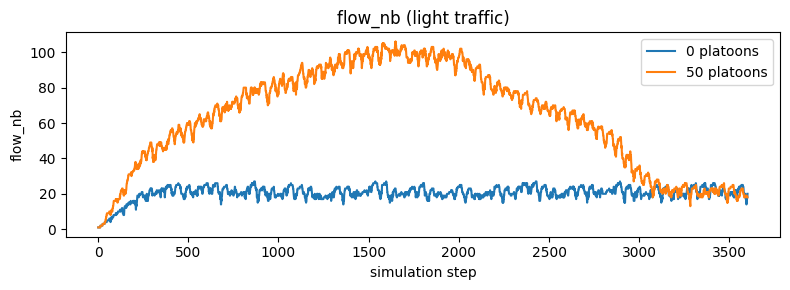

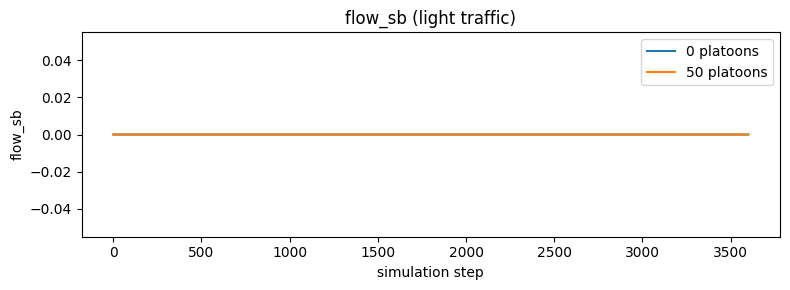

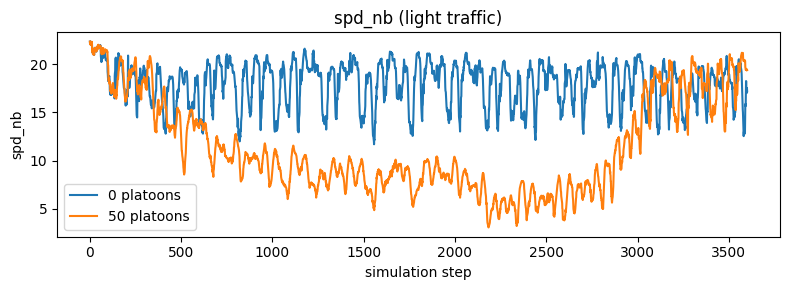

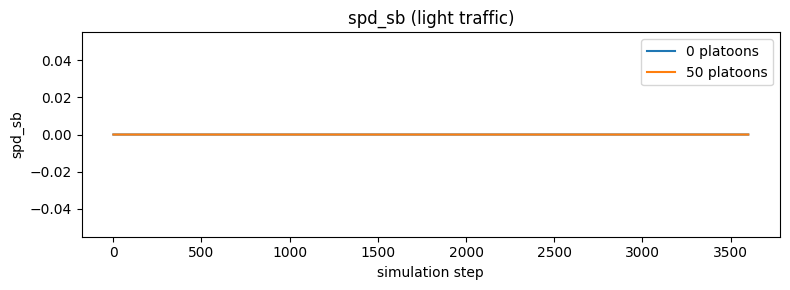

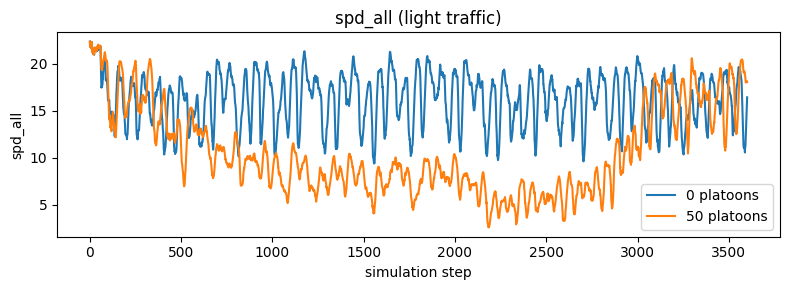

,num_vehicles,avg_gap_nb,flow_nb,flow_sb,spd_nb,spd_sb,spd_all
0 platoons,21.652500,110.415458,20.453333,0.0,17.977901,0.0,16.226006
50 platoons,65.193611,49.319553,63.339167,0.0,11.362918,0.0,10.568993


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ── load CSVs ──────────────────────────────────────────────
df_base       = pd.read_csv("ps4_np0_traffic_light.csv")     # no platoons
df_platoons   = pd.read_csv("ps4_np50_traffic_light.csv")    # 50 platoons

metrics = [c for c in df_base.columns if c != "step"]

# ── line‑plots (one figure per metric) ─────────────────────
for m in metrics:
    plt.figure(figsize=(8, 3))
    plt.plot(df_base["step"], df_base[m], label="0 platoons")
    plt.plot(df_platoons["step"], df_platoons[m], label="50 platoons")
    plt.title(f"{m} (light traffic)")
    plt.xlabel("simulation step")
    plt.ylabel(m)
    plt.legend()
    plt.tight_layout()
    plt.show()

# ── average metrics table ─────────────────────────────────
avg_base     = df_base[metrics].mean()
avg_platoon  = df_platoons[metrics].mean()

summary = pd.DataFrame({
    "0 platoons":  avg_base,
    "50 platoons": avg_platoon
}).T

display(summary)


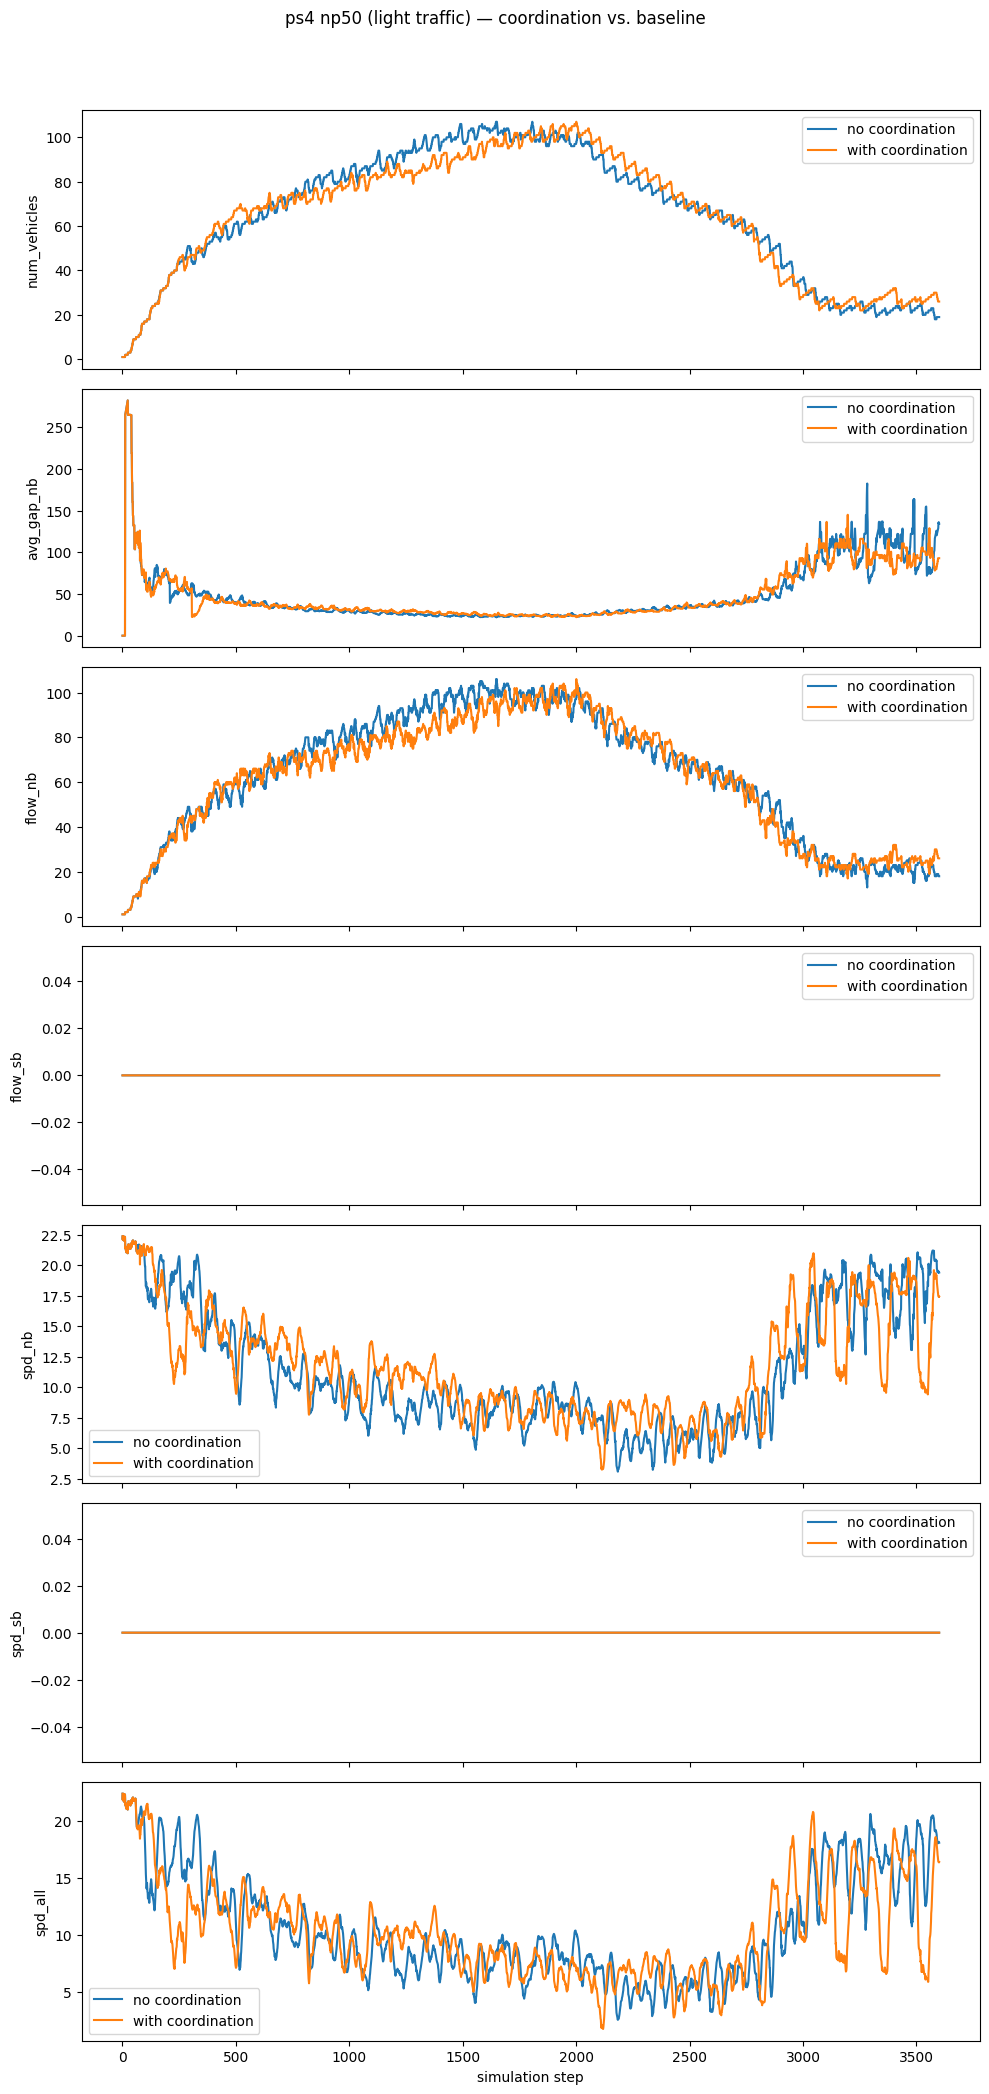

,num_vehicles,avg_gap_nb,flow_nb,flow_sb,spd_nb,spd_sb,spd_all
no coordination,65.19,49.32,63.34,0.00,11.36,0.00,10.57
with coordination,64.68,48.95,61.77,0.00,11.66,0.00,10.23


In [13]:
# Comparison: coordination vs. no‑coordination  (light traffic, ps4 np50)
# -----------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


CSV_NOCO   = "ps4_np50_traffic_light_nocoordination.csv"
CSV_COORD  = "ps4_np50_traffic_light_coordination.csv"

df_no   = pd.read_csv(CSV_NOCO)
df_co   = pd.read_csv(CSV_COORD)

metrics = [c for c in df_no.columns if c != "step"]

# ---------- plots -------------------------------------------------------
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 3*len(metrics)), sharex=True)

for ax, m in zip(axes, metrics):
    ax.plot(df_no["step"], df_no[m],  label="no coordination")
    ax.plot(df_co["step"], df_co[m],  label="with coordination")
    ax.set_ylabel(m)
    ax.legend(loc="best")
axes[-1].set_xlabel("simulation step")
fig.suptitle("ps4 np50 (light traffic) — coordination vs. baseline", y=0.995)
fig.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# ---------- averages ----------------------------------------------------
summary = pd.DataFrame({
    "no coordination":  df_no[metrics].mean(),
    "with coordination": df_co[metrics].mean()
}).T

display(summary.style.format("{:.2f}"))
